# Supported Planforms

The **mmdesigner** code supports a variety of surface model planform. This note details the currently available design choices.

In [1]:
%load_ext tikzmagic

## Assembly

An assembly is a collection of constructed parts joined together to form a single model component. The idea is to capture the major parts of a model that can be separated for transportation and storage purposes. Assemblies may have subassemblies that construct the component parts. For example, the fin is made up of several distinct parts that create the outline and covering of the fin.

### Wing(s)

Most wings have two panels (left and right). A few designs have two wings (upper and lower).

### Stab

The stabilizer also has two panels (left and right).

### Fuselage

The fuselage consists of a motor stick and a tail boom. Since most designs have the fin attached to the tail boom, we consider that component part of the fuselage. To minimize storage space requirements, the motor stick will support wing posts for wing attachment, and stab posts for stabilizer attachment as well. 

### Prop

The propeller consists of spars , blades and the wire making up the prop shaft and hook. At present, built up propellers are not supported (I have not built one yet!)

### 

## Panels

Each defined surface has one or more panels. We distinguish the panels as follows:

### Single

Only one panel is defined - this wuld handle a fin, for example.

### Left

The left (from a pilot's perspective) panel.

### Right

The right(from the pilot's perspective) panel.

## Dihedral Choices

Each planform is assumed to be constructed on a flat surface. Depending on the dihedral choice, each wing panel may be broken at specified **Y** value to form the final wing dihedral shape. 

### Flat

The planform is completely flat (**Z = 0**) for all points within the planform outline.

In [2]:
%%tikz

\coordinate (root) at (0,0);
\coordinate (tip) at (6,0);
\draw (root) -- (tip);
\node[below] at (root) {$X_0$};
\node[below] at (tip) {$X_t$};

### Simple

Each panel is straight and the tip at **Ytip** is elevated to a value of **Ztip**.

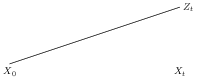

In [6]:
%%tikz

\coordinate (root) at (0,0);
\coordinate (tip) at (6,2);
\draw (root) -- (tip);
\node[below] at (root) {$X_0$};
\node[below] at (6,0) {$X_t$};
\node[right] at (tip) {$Z_t$};

### FlatPoly

The planform is flat up to a value of **Yc**. The outer tip at **Ytip** is elevated to a value of **Ztip**

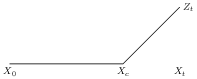

In [8]:
%%tikz
\coordinate (root) at (0,0);
\coordinate (center) at (4,0);
\coordinate (tip) at (6,2);
\draw (root) -- (center) -- (tip);
\node[below] (root) {$X_0$};
\node[below] at (4,0) {$X_c$};
\node[below] at (6,0) {$X_t$};
\node[right] at (6,2) {$Z_t$};

### GenPoly

The planform is at **Z=0** at the wing root, and elevated to **Zc** at **Yc**, and to **Ztip** at **Ytip**.

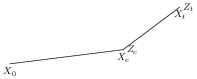

In [14]:
%%tikz
\coordinate (root) at (0,0);
\coordinate (center) at (4,0.5);
\coordinate (tip) at (6,2);
\draw (root) -- (center) -- (tip);
\node[below] (root) {$X_0$};
\node[below] at (center) {$X_c$};
\node[below, right] at (center) {$Z_c$};
\node[below] at (tip) {$X_t$};
\node[right] at (tip) {$Z_t$};

## Leading-Trailing Edge Choices

The edges may be straight in one piece, or broken into two or more segments. The final segment may end in a circular arc.

### Straight{LE,TE}

The leading edge is one straight piece from **X0** to **Xtip**. The ends have specified **X** values

### Segmented{LE,TE}

The leading edge is broken at **n** points. At each point the **X** offset of the end point is specified. The root **X** value is set at **0**.

## Tip choices

The tip is either square (straight tip rib), or rounded with a circluar arc. 

### SquareTip{LE,TE}

A straignt segment running from leading edge to trailaing edge. The span is specified by the final location of the leading and trailing segments.

### ArcTip{LE,TE}

A circular arc with a specified **TipRadius** runs to the tip **y** value and joins the designated edge.

## Rib Locations

There will be a **n** ribs in each wing panel. Ribs are normally aligned parallel t the **X** axis, but some designs call for the ribs to be angled (rotated along the **Z** axis). AT palen segment joints, most builders glue ribs to one side of the joint vertically aligned. This causes minor problems in creting "nice" jonts using OpenSCD. A better setup places the rib at the joint and aligns it canted at an angle equal to one half of the joint angle. In any case, we need a full translation and rotation data definition o fully place each rib. location will be specifed for each rib. 